<div style="text-align: center; font-weight: bold; font-size: 200%">Projet - Calcul du Call sous le modèle de Black & Scholes </div><br />
<div style="text-align: center; font-weight: bold; font-size: 200%">Partie 1 </div><br />

Ce projet est divisé en deux parties. On invite le lecteur à prendre connaissance de la deuxième partie après la lecture de celle-ci. 

## I. Introduction - Le modèle :  

$\textbf{1. Equations }$ 

Avant de présenter notre simulation, il nous semblait primordial d'expliquer en profondeur les quantités que l'on veut manipuler tout au long de ce projet pour mieux comprendre ce qu'elles représentent et comment elles affectent le code.

On considère le modèle classique de Black & Scholes : On fixe un horizon $T$ , deux actifs $St$ et $Bt$ définis par : 

$$
    \forall 0 \leq t \leq T,\quad
    dB_t = r B_t dt ,\quad
    dS_t = \mu S_t dt + \sigma S_t dW_t 
$$

$B_t$ est un placement sans risque de prix, $S_t$ est une action de prix appelée $\textit{Spot}$ et $r$ est le taux d'interêt.  

L'équation que décrit $S_t$ vient du fait que le rendement du spot est environ égal à $\mu dt$ à une perturbation aléatoire près $\sigma  dW_t$. L'amplitude de cette perturbation est mesurée par $\sigma$ que l'on appelle la $\textit{Volatilité}$ du spot. En particulier, $W_t$ désigne un mouvement brownien sur un espace $(\Omega , F, \mathbb{P})$

Rappelons la définition de celui-ci: 

$\textbf{Définition :}$ $\textit{On appelle mouvement brownien le processus $W_t$, $t\in \mathbb{R^+}$, à trajectoires continues, tel que $W_0 = 0$ $\quad$ et $\quad$ $\forall 0 \leq s \leq t: $}$ 

$$ W_t-W_s \sim\mathcal{N}(0,t-s) $$
$$W_t-W_s\quad \textit{est indépendant de} \quad W_r\quad , r \leq s $$ 
 

Le corollaire qui en découle est plus intéressant d'un point de vue pratique : 

$\textbf{Corollaire: }$ $\textit{Un processus {$W_t , t\in \mathbb{R^+}$} est un mouvement brownien si et seulement si c'est un processus gaussien vérifiant}$
$$ E(W_t)=0, \quad$$ 
$$   E(W_t W_s) = min(s,t),\quad \forall t,s \geq 0    $$

$\textbf{2. Résolution de l'équation différentielle stochastique}$   

Afin de trouver une solution à l'équation $dS_t = \mu S_t dt + \sigma S_t dW_t $, on propose d'utiliser le lemme d'ito.


$\textbf{Lemme d'Ito:  }$$\textit{Soit $X_t$ est un processus d'Ito (unidimensionnel) s'écrivant}$
$$ 
X_t = X_0 + \displaystyle \int_{0}^{t} a_s \, \mathrm{d}s + \displaystyle \int_{0}^{t} \sigma_s  \, \mathrm{d}W_s
$$
$\textit{où a et $\sigma$ sont des processus adaptés continus.}$

$\textit{Si $f:\mathbb{R} * \mathbb{R^+}  \longrightarrow \mathbb{R}$ est de classe $C^2$, alors la formule d'Ito s'écrit}$
$$ 
d(f(X_t,t)) = \frac{\partial f }{\partial t}(X_t,t) dt + \frac{\partial f }{\partial x}(X_t,t) dX_t + \frac{1}{2}\frac{\partial^2 f}{\partial x^2}(X_t,t) \sigma^2_t dt 
$$


On divise l'équation par le spot (supposé non nul par définition) 

$$\frac {dS_t}{S_t} = \mu dt + \sigma dW_t  \quad \quad[1] $$

On pose $$ \gamma_t = \ln(S_t) $$ Cette fonction étant de classe $C^2$, on peut appliquer la formule d'Ito : 
$$ d\gamma_t = \frac {dS_t}{S_t} - \frac {(S_t \sigma)^2}{2 S_t^2} dt$$
On remplace $\frac {dS_t}{S_t}$ grâce à la formule [1] 
$$ d\gamma_t = (\mu - \frac {\sigma^2}{2}) dt + \sigma dW_t$$
En intégrant cette équation, on obtient : 
$$ \gamma_t - \gamma_0  = (\mu - \frac {\sigma^2}{2}) t + \sigma W_t$$
En passant à l'exponentielle, on obtient la formule du Spot 
$$\fbox{$ S_t  = S_0 exp[(\mu - \frac {\sigma^2}{2}) t + \sigma W_t]$}$$


$\textbf{3. Option Call }$   

Une option Call est un contrat donnant à son détenteur le droit mais pas l'oblgation d'acheter un actif donné. Le Call européen autorise l'achat de  cet actif à une date donnée à un prix convenu à l'avance, appelé $\textit{Strike}$. 

Soit $S_t$ le prix du Spot à la date $t$ , $T$ la date d'échéance et $K$ le Strike. Le détenteur du Call européen a le choix d'acheter ou non l'actif au prix $K$ à la date $T$.  

Si $S_T > K$, il achète donc $K$, un produit qui vaut $S_t$. En revendant immédiatement l'actif le jour $T$, il reçoit un bénéfice
$$S_T - K $$ 
En revanche, si $S_T \leq K$, il ne fait rien et reçoit 
$$0$$
Dans tous les cas, il reçoit donc 
$$\fbox{$(S_T-K)_+$}$$ 
Qu'on appelle le $\textit{Pay-off}$ du Call où $x^+ = max(x,0)$

C'est la quantité centrale de notre projet, que l'on aimerait simuler. Pour cela, on considère $d \geq 2$ actifs évalués à l'instant T $(S_T^1, ..., S_T^d)$ et on s'interesse au prix du Call sur le panier de ces $d$ actifs 
$$ \fbox {$E[(\frac{1}{d} \sum_{i=1}^{d} S_T^i - K )_+]$}  $$

$\textbf{4. Simulation de mouvements browniens en dimension $d \geq 2$}$   

La première difficulté de simulation consiste à trouver une forme plus explicite de $(S_T^1, ..., S_T^d)$. En effet, ces quantités s'expriment en fonction de mouvements browniens corrélés et on ne sait pas les simuler directement. 

Essayons dans un premier temps d'exprimer  $(dS_T^1, ..., dS_T^d)$. Pour décrire le modèle Black & Scholes corrélé, on pose 

$$dS_T ^0 = r S_T^0 dT$$
$$dS_T^1 = r S_T^1 dT + \sigma S_T^1 dW^1_T$$
$$dS_T^2 = r S_T^1 dT + \sigma S_T^1 dW^2_T$$
$$\vdots$$
$$dS_T^d = r S_T^d dT + \sigma S_T^d dW^d_T$$

$dS_T^0$ représente le placement sans risque $dB_T$ défini au début. On considère donc la même valeur de rendement pour $B_T$ et $S_T$ 

$(W^1, ..., W^d)$ désigne un mouvement brownien corrélé de dimension $d$

Pour exprimer cette corrélation, on pose : 

$${W^i_T} = \rho W^1_T + \sqrt{1-\rho^2} G^i_T,  2\leq i \leq d $$ où $(W_1,G_2, ..., G_d)$ sont des mouvements browniens indépendants et $\rho \in [0,1]$ le coefficient de corrélation.   

D'après le corollaire défini dans la partie 1 ci-dessus, on déduit que 

- $(W^1, ..., W^d)$ suit une loi normale 
- $E(W_T^i) = \rho E [W^1_T] + \sqrt{1-\rho^2}E[G^i_T] = 0,  \quad 2\leq i \leq d$
- $cov(W^i_T,W^j_T) = \rho T , \quad \forall i \ne j $
- $cov(W^i_T,W^i_T) = T , \quad 1\leq i \leq d $
$$Soit \quad 
\begin{pmatrix}
W^1 \\ \vdots \\ W^d
\end{pmatrix} 
\sim \mathcal{N} \big(0, T . \Sigma \big), \quad 
\text{avec} \quad 
\Sigma = \begin{pmatrix}
1 & \rho & \cdots& \cdots & \rho \\
\rho & 1 & \rho & \cdots & \rho \\
\vdots & \ddots & \ddots & \ddots &\vdots \\
\rho & \cdots& \ddots & 1 & \rho \\
\rho & \rho & \cdots & \rho & 1
\end{pmatrix} \quad \quad (*) 
$$

On avait démontré dans la partie précédente que
$$ S_T^i  = S_0 exp[(r - \frac {\sigma^2}{2}) T + \sigma W_T^i], \quad \forall 1 \leq i \leq d $$ 
Cela revient donc à considérer, d'après $(*)$  
$$ \fbox{$ S_T^i  = S_0 exp[(r - \frac {\sigma^2}{2}) T + \sigma \sqrt{T} \tilde{G_i}]  , \quad \forall 1 \leq i \leq d$}$$
où $(\tilde{G_1}, ...,\tilde{G_d})  \sim \mathcal{N} \big(0,\Sigma \big) = \mathcal{N} \big(0,LL^T)$ d'après la décomposition de Cholesky. 

## II. Simulation - Monte carlo  :  

Afin de simuler la quantité  
$$ E[(\frac{1}{d} \sum_{i=1}^{d} S_T^i - K )_+]  $$
On implémente un estimateur Monte Carlo en travaillant avec des échantillons i.i.d $(S_T^{(1)}, ..., S_T^{(n)})$ où chaque échantillon est de dimension $d$ et intégrable.
La $\textit{Loi forte des grands nombres}$ nous assure donc la convergence vers la quantité souhaitée. En effet : 
$$ I_n = \frac{1}{n}  \sum_{j=1}^{n} \psi(S_T^{(j)}) \quad \text{vérifie}\quad   \underset{n}{lim} I_n = E [\psi(S_T^{(1)})] \quad p.s. $$ 
$$ \text{où}\quad \psi(S_T^{(1)}) = (\frac{1}{d} \sum_{i=1}^{d} S_T^i - K )_+$$ 


On opte pour une approche vectorielle où on simule directement tout l'échantillon afin d'éviter les boucles $\textit{for}$. Concrêtement, on construit une matrice de taille $d*n$ comme suit :  
$$ \begin{pmatrix}
S_T^{1,1} & \cdots & S_T^{1,n} \\
\vdots & \cdots& \vdots  \\
S_T^{d,1} & \cdots & S_T^{d,n}
\end{pmatrix}
$$
On est en mesure de calculer directement
$$\frac{1}{d} \sum_{i=1}^{d} S_T^i$$ 
En opérant uniquement sur les composantes de chaque vecteur colonne de cette matrice grâce à `np.mean(., axis=0)`


In [10]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from numpy.random import default_rng
rng = default_rng()
import pandas as pd

Remarque: Notre fonction `psi` prend en argument tous les paramètres du problème. En effet, on souhaite faire varier ceux-là tout au long de l'étude. On crée donc une fonction qui est en mesure d'adapter les données fournies aux différentes configurations qu'on fixe à chaque fois. 

In [11]:
def psi(sample_G, mu, T, sigma, S0, mat_L, K) :  
    ST = S0[:,None] * np.exp(mu[:,None] * T + sigma[:,np.newaxis] * np.sqrt(T) * mat_L @ sample_G) #on transforme S0 et mu en colonne + multiplication matricielle 
    g = np.mean(ST,axis=0 )  #renvoie la moyenne de chaque vecteur colonne 
    return np.maximum( g-K , 0)

On crée une fonction qui renvoie l'estimateur de l'espérance, l'estimateur sans biais de la variance (directement accessible grâce à la fonction `np.var(., ddof=1)` et les deux bornes de l'intervalle de confiance asymptotique à 95%. On rapelle que cet intervalle de confiance est construit grâce au $\textit{Théorème Central Limite : } $ 

Soit $(X_n)_{n \ge 1}$ une suite de variables aléatoires _i.i.d._ de carré intégrable. On définit les suites $(m_n)_{n \ge 1}$ et $(\sigma_n^2)_{n \ge 2}$ de la façon suivante

$$
  m_n = \frac{1}{n} \sum_{k=1}^n X_k \qquad \text{et} \qquad 
  \sigma_n^2 = \frac{1}{n-1} \sum_{k=1}^n (X_k - m_n)^2 \quad \text{pour} \; n \ge 2
$$
Alors, d'après le TCL 
$$
  \sqrt{n} \Bigl({m_n - m}\Bigr) \xrightarrow{\mathcal{L}} \mathcal{N}(0, \sigma^2).
$$

De plus, d'après le lemme de Slutsky, comme 
$$ \frac{\sigma}{\sigma_n} \rightarrow 1 \quad p.s$$ 
on en déduit que 
$$ \sqrt{n} \Bigl(\frac{m_n - m}{\sigma_n}\Bigr) \xrightarrow{\mathcal{L}} \mathcal{N}(0, 1).$$
On obtient l'intervalle de confiance asymptotique : 

$$I_c = \biggl( m \in 
  \biggl[
    m_n - \frac{\phi^{-1}(\frac{\alpha}{2}) \sigma_n}{\sqrt{n}}, 
    m_n + \frac{\phi^{-1}(\frac{\alpha}{2}) \sigma_n}{\sqrt{n}}
  \biggr] \biggr)
$$
où $\phi^{-1}(\frac{\alpha}{2})$ est le quantile d'ordre $\frac{\alpha}{2}$ de la loi normale centrée réduite. C'est possible de simuler ce quantile directement grâce à la commande `stats.norm.ppf`


In [12]:
def monte_carlo (sample, proba=0.95) : 
    mean = np.mean(sample) 
    var = np.var ( sample , ddof = 1) #ddof=1 désigne la variance sans biais 
    alpha = 1-proba 
    quantile_alpha = stats.norm.ppf (1- alpha/2 ) 
    intervalle_size = quantile_alpha * np.sqrt(var / sample.size) 
    return (mean, var , mean-intervalle_size, mean+intervalle_size) 

Pour cette partie de l'étude, on fixe nos paramètres d'initialisation. En particulier, on choisit K $\in$ [80,120], n = 100000 et d =10. On discutera la pertinence du choix de ces paramètres dans les parties suivantes.  
On précise que grâce à la décomposition de Cholesky, on est en mesure de générer des variables aléatoires de loi Normale centrée réduite qu'on multiplie par la matrice L de décomposition de Cholesky afin de simuler la loi 
$$(\tilde{G_1}, ...,\tilde{G_d})  \sim \mathcal{N} \big(0,\Sigma \big) = \mathcal{N} \big(0,LL^T)$$ 

De plus, on suppose ici que certains actifs sont plus volatiles que d'autres. Cela revient à poser 
$$ \sigma_i = \frac{i}{2 d} \quad \forall 1 \leq i \leq d  $$ 

In [13]:
#initialisation: 
d = 10
T = 1
r = 0.01
S0 = np.full(d, 100) 
sigma = np.arange(1,d+1)/(2*d)
mu = r - 0.5*sigma**2
rho = 0.2
correl = np.full((d,d), rho) + (1-rho)*np.eye(d) #matrice avec des rho + matrice avec (1-rho) sur la diagonale  
mat_L = np.linalg.cholesky(correl)
n = int(1e5)

On crée un data frame qui renvoie les valeurs de l'espérance, variance et les deux bornes de l'intervalle de confiance pour chaque valeur de K grâce à la librairie pandas.  

In [14]:
Strike = [80,90,100,110,120]

sample_G_mc = rng.standard_normal(size=(d, n))

MC = [ monte_carlo(psi(sample_G_mc, mu, T, sigma, S0, mat_L, k), 0.95) for k in Strike ]

df_mc = pd.DataFrame(MC, columns=['mean', 'var', 'lower', 'upper'], index= Strike)
df_mc.style.set_table_attributes("style='display:inline'").set_caption('Estimateur Monte Carlo avec $K\in[80,120]$, $n=10^5$, $d =10$ et $T=1$')


,mean,var,lower,upper
80,21.352174,227.569974,21.258675,21.445673
90,12.814510,180.683737,12.731198,12.897822
100,6.610203,111.415577,6.544782,6.675625
110,2.963384,54.451268,2.917649,3.009119
120,1.195499,22.552513,1.166065,1.224933


## III. Comparaison des méthodes de simulations 

$\textbf{1. Variables antithétiques }$   

On commence par remarquer que la fonction 
$$ G_i \longrightarrow \psi\circ\phi(G_1, .., G_i,.., G_d)) \quad \textit{est monotone}$$
où $$\phi(G_1,...,G_d) = (S_T^1, ..., S_T^d)$$
De plus $$\psi\circ\phi(G_1,.., G_d)) \in L^2$$ 
On pose, de plus,  
$$T_i(G_i) = -G_i$$ 
On a
$$ T_i(G_i) \sim  G_i \quad \text{car la loi normale est symétrique}$$ 

Alors on sait d'après le cours que 
$$ cov(\psi(G_1,...,G_d) ,\psi(T_1(G_1),...,T_d(G_d)) \leq 0 $$ 
Et que l'estimateur antithétique 
$$\tilde{I_n} = \frac{1}{2n} \sum_{k=1}^{n}\psi\circ\phi(G_1^{(k)},...,G_d^{(k)})+ \psi\circ\phi(T_1(G_1^{(k)}),...,T_d(G_d^{(k)}))$$

$$\fbox{$\tilde{I_n} = \frac{1}{2n} \sum_{k=1}^{n}\psi\circ\phi(G_1^{(k)},...,G_d^{(k)})+ \psi\circ\phi(-G_1^{(k)},...,-G_d^{(k)})$}$$

est efficace, c'est donc intéressant de l'implémenter dans cette configuration. 

In [15]:
V_A = [monte_carlo(0.5 * (psi(sample_G_mc, mu, T, sigma, S0, mat_L, k) + psi(-sample_G_mc, mu, T, sigma, S0, mat_L, k)),0.95) for k in Strike]

df_antith = pd.DataFrame(V_A, columns=['mean', 'var', 'lower', 'upper'], index=Strike)
df_antith.style.set_table_attributes("style='display:inline'").set_caption('MC avec variables antithétiques avec $K\in[80,120]$, $n=10^5$, $d =10$ et $T=1$')


,mean,var,lower,upper
80,21.282856,14.102858,21.259580,21.306131
90,12.748193,25.684152,12.716782,12.779604
100,6.566441,33.793073,6.530411,6.602471
110,2.941816,22.472642,2.912434,2.971197
120,1.181188,10.285183,1.161311,1.201065


$\textbf{2. Variable de contrôle }$   

On souhaite vérifier si c'est possible d'introduire une variable de contrôle $Y \in L^2$ tel que 

$$ E[\psi\circ\phi(G_1, ..., G_d)] = E[\psi\circ\phi(G_1, ..., G_d) - Y ] + E[Y] $$

Il faut que celle-ci respecte deux critères : 
- On sait calculer $E[Y]$ précisément 
- $Y$ est proche de $X$ et positivement corrélée avec $X$ où $X = \psi\circ\phi(G_1, ..., G_d)$ 

Si ces critères sont respectés, alors 
$$\fbox{$ \hat{I}_n = \frac{1}{n}\sum_{k=1}^{n}(\psi\circ\phi(G_1^{(k)},...,G_d^{(k)}) - \tilde{Y}_k)  $}$$ 
où $$\tilde{Y} = Y - E[Y]$$ 
est l'estimateur avec variable de contrôle Y.


$\underline{\text{Prix du Call en dimension 1} }$

Il existe une formule fermée qui donne le prix du Call en dimension 1. C'est la  $\textit{formule de Black & Scholes}$ qu'on va admettre pour notre étude: 

\begin{equation*}
    P_{\text{BS}}\big(x, r, \sigma, T, K\big) = x F_{\mathcal{N}(0,1)}(d_1) - K e^{-r T} F_{\mathcal{N}(0,1)}(d_2),
\end{equation*}

avec
- $ F_{\mathcal{N}(0,1)} \text{la fonction de répartition de la loi normale centrée réduite}$
- $d_1 = \frac{1}{\sigma \sqrt{T}} \Big( \log\big( \frac{x}{K} \big) + \big(r + \frac{\sigma^2}{2}\big) T \Big)$
- $ d_2 = d_1 - \sigma \sqrt{T}$ 

$\underline{\text{Lien avec Variable de contrôle} }$

Pour une option Basket (en dimension $d \ge 2$) on approche le prix par Monte Carlo mais on peut utiliser des approximations pour construire un problème unidimensionnel proche du produit Basket.

On introduit $a^i_0 = \frac{S^i_0}{\sum_{j=1}^d S^j_0}$ (t.q. $\sum a^i_0 = 1$) et $\bar S_0 = \frac{1}{d} \sum_{i=1}^d S^i_0$.On a alors
$$(S_T^1, ..., S_T^d) = \biggl(\bar S_0 \sum_{i=1}^d a^i_0 e^{\mu_i T + \sigma_i \sqrt{T} \tilde{ G_i}}  - K\biggr)_+ $$
en posant $\mu_i = r - \frac{1}{2}\sigma_i^2$
La variable de contrôle proposée est obtenue en échangeant l'exponentielle et la moyenne pondérée par les poids $\big(a^i_0\big)_{i=1,\dots,d}$:
\begin{equation*}
    Y = \bigl(\bar S_0 e^Z  - K\bigr)_+
    \quad \text{avec} \quad 
    Z = \sum_{i=1}^d a^i_0 \big(\mu_i T + \sigma_i \sqrt{T}  \tilde{G_i}\big) 
\end{equation*}
La variable aléatoire $Z$ suit une loi gaussienne $Z \sim \mathcal{N}(m T, s^2 T)$ avec
\begin{equation*}
    m = \sum_{i=1}^d a^i_0 \mu_i
    \quad \text{et} \quad
    s^2 = \sum_{i=1}^d \Big( \sum_{j=1}^d a^i_0 \sigma_i L_{ij} \Big)^2. 
\end{equation*}

Ainsi l'espérance de la variable de contrôle $Y$ est connue par la formule de Black-Scholes, car elle correspond au prix d'un call de strike $K$ d'un actif Black-Scholes de dimension 1, de valeur initiale $\bar S_0$, de taux $\rho = m+\frac{1}{2} s^2$ et de volatilité proportionnelle à $s$.

On a donc
$$\fbox{$ e^{-\rho T} \mathbf{E} \big[ Y \big] = P_{\text{BS}}\big(\bar S_0, \rho, s, T, K\big)$}$$

- On a bien une formule précise pour l'espérance de Y 
- De plus $X$ et $Y$ vérifient bien 
$$Var(X - Y) < Var(X) $$
Avec 
$$ X = \psi\circ\phi(G_1, ..., G_d) = \bigl(\frac{1}{d} \sum_{i=1}^{d} S_T^i - K \bigr)_+ $$ 
$$ Y =  \bigl(\bar S_0 e^Z  - K\bigr)_+ $$ 

On est enfin en mesure d'implémenter cette solution, en considérant un échantillon $(S_T^{(1)}, ..., S_T^{(n)})$ d'actifs de dimension d chacun.  

In [16]:
def price_call_BS(x, r, sigma, T, K):
    d1 = (np.log(x / K) + T * (r + 0.5*sigma**2)) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return x * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)

In [17]:
barS0 = S0.mean()
a = S0 / S0.sum()
m = (a * (r - 0.5*sigma**2)).sum()
s2 = (((a * sigma).T @ mat_L)**2).sum()  #.T >> transposée 
rho_controle = m + 0.5*s2


In [18]:
Liste_controle = [] #on souhaite appliquer la variable de contrôle à plusieurs valeurs de K
for j in Strike:
    Z = np.sum(a[:,None] * (m*T + sigma[:,None]*np.sqrt(T)*mat_L@sample_G_mc), axis = 0)
    Y = np.maximum(S0.mean() * np.exp(Z) - j, 0)
    Y_mean = np.exp(rho_controle*T) * price_call_BS(barS0, rho_controle, np.sqrt(s2), T, j) #valeur exacte de E[Y]
    control_variate = Y - Y_mean
    sample_controle = psi(sample_G_mc, mu, T, sigma, S0, mat_L, j ) - control_variate
    Liste_controle.append(monte_carlo(sample_controle))

df_controle = pd.DataFrame(Liste_controle, columns=['mean', 'var', 'lower', 'upper'], index=Strike)
df_controle.style.set_table_attributes("style='display:inline'").set_caption('MC avec variable de contrôle avec $K\in[80,120]$, $n=10^5$, $d =10$ et $T=1$')


,mean,var,lower,upper
80,21.310963,6.593894,21.295047,21.326878
90,12.788713,7.785285,12.771420,12.806007
100,6.609645,8.082580,6.592024,6.627265
110,2.977258,6.701934,2.961212,2.993303
120,1.204193,4.501451,1.191043,1.217343


$\textbf{3. Variable de contrôle optimale }$   

On a réussit à construire une variable Y qui vérifie 
$$cost(Y) \approx cost(X)$$ 
On en déduit que $$\lambda Y \quad \text{vérifie la même propriété où $\lambda \in \mathbb{R}$ }$$

On veut améliorer l'approximation par variable de contrôle en cherchant un $\lambda^*$ optimal qui minimise $Var(X-\lambda Y)$

D'après le cours, on sait que $\lambda^*$ vérifie : 
$$ \lambda^* = \frac{Cov(X,Y)}{Var(Y)} = \frac{E[(X-E[X])(Y-E[Y])]} {E[(Y-E[Y])^2]} $$ 
Or, comme 
$$ E[(X-E[X])(Y-E[Y])] = E[X(Y-E[Y]) - E[X](Y-E[Y])] = E[X(Y-E[Y])] $$ 
Cela revient à considérer 
$$ \lambda^* = \frac{E[(X(Y-E[Y])]} {E[(Y-E[Y])^2]}  $$ 

En pratique, on peut construire un estimateur $\lambda_n$ pour approcher $\lambda^*$ 
$$ \lambda_n = \frac{\sum_{k=1}^{n} X_k \tilde{Y}_k}{\sum_{k=1}^{n}\tilde{ Y}_k^2}$$ 
où 
$$\tilde{Y} = Y - E[Y] $$ 
Et l'estimateur 
$$\fbox{$ \hat{I}_{\text{n optimal}}= \frac{1}{n}\sum_{k=1}^{n}((\psi\circ\phi(G_1^{(k)},...,G_d^{(k)}) -\lambda_n \tilde{Y}_k)   $}$$ 
est efficace. 

In [19]:
Liste_controle_opt = []

for j in Strike:
    Z = np.sum(a[:,None] * (m*T + sigma[:,None]*np.sqrt(T)*mat_L@sample_G_mc), axis = 0)
    Y = np.maximum(S0.mean() * np.exp(Z) - j, 0)
    Y_mean = np.exp(rho_controle*T) * price_call_BS(barS0, rho_controle, np.sqrt(s2), T, j)
    
    Y_centrée = Y - Y_mean
    Lambda = np.mean(psi(sample_G_mc, mu, T, sigma, S0, mat_L, j ) * Y_centrée ) / np.mean(Y_centrée**2) 
    sample_optimal = psi(sample_G_mc, mu, T, sigma, S0, mat_L, j ) - (Lambda * Y_centrée)  
   
    Liste_controle_opt.append(monte_carlo(sample_optimal))
    
df_controle_opt = pd.DataFrame(Liste_controle_opt, columns=['mean', 'var', 'lower', 'upper'], index=Strike)
df_controle_opt.style.set_table_attributes("style='display:inline'").set_caption('MC avec variable de contrôle optimale avec $K\in[80,120]$, $n=10^5$, $d =10$ et $T=1$')



,mean,var,lower,upper
80,21.307514,5.404326,21.293105,21.321922
90,12.785135,5.262995,12.770916,12.799354
100,6.609523,4.661534,6.596141,6.622904
110,2.981763,3.627579,2.969958,2.993568
120,1.208232,2.473824,1.198484,1.217981


$\textbf{4. Une autre méthode de réduction de variance }$

On a construit une méthode de variable de contrôle et de variable de contrôle optimale qui minismise la variance. On sait que la variable de contrôle optimale est meilleure que la variable de contrôle par construction. On se demande si elle serait meilleure que l'approximation par variable antithétique. Une autre question attise notre curiosité : 

Est-ce que c'est possible de faire un lien entre l'approximation par variable antithétique et variable de contrôle optimale ? 
On aimerait donc créer une méthode de réduction de variance hybride qui contiendrait à la fois une réduction de variance par variable de contrôle et antithétique. 
Dans la section précédente, on avait démontré que 

$$\hat{I}_{\text{n optimal}}= \frac{1}{n}\sum_{k=1}^{n}((\psi\circ\phi(G_1^{(k)},...,G_d^{(k)}) -\lambda_n \tilde{Y}_k)$$
On peut voir cette expression comme 
$$\hat{I}_{\text{n optimal}}= \frac{1}{n}\sum_{k=1}^{n}\Gamma(G_1^{(k)},...,G_d^{(k)})$$
où
$$\Gamma(G_1^{(k)},...,G_d^{(k)}) = \psi\circ\phi(G_1^{(k)},...,G_d^{(k)}) -\lambda_n \tilde{Y}_k \quad \forall 1 \leq k \leq n $$


On aimrait appliquer la méthode de réduction par variable antithétique à $\hat{I}_{\text{n optimal}}$ 

On sait que $ \Gamma(G_1, ..., G_d) \in L^2$. En effet, c'est la composée de deux fonctions $L^2$ 

En théorie, si 

$$ G_i \longrightarrow \Gamma(G_1, .., G_i,.., G_d) \quad \textit{est monotone}$$



Alors, d'après le cours, on devrait avoir l'efficacité de cet estimateur 

$$\fbox{$\hat{I}_{\text{n hybride}}= \frac{1}{2n}\sum_{k=1}^{n}\Gamma(G_1^{(k)},...,G_d^{(k)}) + \Gamma(-G_1^{(k)},...,-G_d^{(k)})$} $$

Pour vérifier qu'il est efficace, on propose donc de l'implémenter. 

In [25]:
#On invite le lecteur à voir la version optimisée de ce code dans la partie 2 du projet. 

Liste_hybride = []

for j in Strike:
    
    Z_1 = np.sum(a[:,None] * (m*T + sigma[:,None]*np.sqrt(T)*mat_L@sample_G_mc), axis = 0)
    Y_1 = np.maximum(S0.mean() * np.exp(Z_1) - j, 0)
    Y_mean_1 = np.exp(rho_controle*T) * price_call_BS(barS0, rho_controle, np.sqrt(s2), T, j)
    
    Z_2 = np.sum(a[:,None] * (m*T + sigma[:,None]*np.sqrt(T)*mat_L@(-sample_G_mc)), axis = 0)
    Y_2 = np.maximum(S0.mean() * np.exp(Z_2) - j, 0)
    Y_mean_2 = np.exp(rho_controle*T) * price_call_BS(barS0, rho_controle, np.sqrt(s2), T, j)
    
    Y_centrée_1 = Y_1 - Y_mean_1  #échantillon Gk
    Y_centrée_2 = Y_2 - Y_mean_2  #échantillon -Gk 
    
    Lambda_1 = np.mean(psi(sample_G_mc, mu, T, sigma, S0, mat_L, j ) * Y_centrée_1 ) / np.mean(Y_centrée_1**2)
    Lambda_2 = np.mean(psi(-sample_G_mc, mu, T, sigma, S0, mat_L, j ) * Y_centrée_2 ) / np.mean(Y_centrée_2**2)
    
    sample_hybride = 0.5 * ((psi(sample_G_mc, mu, T, sigma, S0, mat_L, j ) - Y_centrée_1) + (psi(-sample_G_mc, mu, T, sigma, S0, mat_L, j ) - Y_centrée_2))
   
    Liste_hybride.append(monte_carlo(sample_hybride))
    
df_hybride = pd.DataFrame(Liste_hybride, columns=['mean', 'var', 'lower', 'upper'], index=Strike)
df_hybride.style.set_table_attributes("style='display:inline'").set_caption('MC avec VC + Antithétique avec $K\in[80,120]$, $n=10^5$, $d =10$ et $T=1$')

,mean,var,lower,upper
80,21.303879,4.249010,21.291103,21.316655
90,12.775451,3.527432,12.763810,12.787091
100,6.593336,2.372416,6.583790,6.602883
110,2.965890,2.662395,2.955777,2.976004
120,1.197557,2.035705,1.188714,1.206400


$\textbf{5. Comparaison des méthodes de simulation }$

Text(0.5, 1.0, 'Ratio de variances en fonction du Strike avec $K\\in[80,120]$, $S_0=100$, $n=10^5$, $d =10$ et $T=1$')

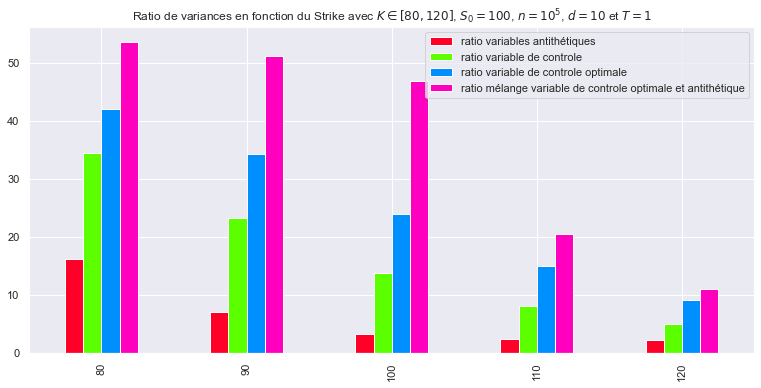

In [26]:
ratio_antith = df_mc["var"] / df_antith["var"]
ratio_controle = df_mc["var"] / df_controle["var"]
ratio_controle_optimal = df_mc["var"] / df_controle_opt ["var"]
ratio_hybride = df_mc["var"] / df_hybride ["var"]

A = ratio_antith.to_list()
C = ratio_controle.to_list()
C_O = ratio_controle_optimal.to_list()
C_1 = ratio_hybride.to_list()

df_ratio = pd.DataFrame(A, columns=["ratio variables antithétiques"], index= Strike)
df_ratio["ratio variable de controle"] = C #je rajoute des colonnes à mon data frame
df_ratio["ratio variable de controle optimale"] = C_O
df_ratio["ratio mélange variable de controle optimale et antithétique"] = C_1


df_ratio.plot.bar(colormap='gist_rainbow', figsize=(13,6))  #data frame visualisé directement avec des barres 

plt.title('Ratio de variances en fonction du Strike avec $K\in[80,120]$, $S_0=100$, $n=10^5$, $d =10$ et $T=1$')


- Dans cette configuration, la méthode d'approximation par mélange de variable de contrôle optimale & antithétique est la meilleure méthode de réduction de variance. En effet, le ratio de la variance de l'estimateur Monte Carlo/estimateur hybride est le plus élevé. 
- Cependant, on remarque une dégradation de l'éfficacité de celle-ci (et l'ensemble des autres estimateurs) quand la valeur de $K$ augmente. En effet, elle est optimale quand $K<S_0 = 100$ mais se détériore dès que $K$ dépasse $S_0$. L'évènement $S_0<K$ est assez particulier dans notre cas d'étude et soulève une question importante : est-ce toujours pertinent de travailler avec l'approximation mélange contrôle & antithétique ? 

## IV. Importance sampling, étude d'un évènement rare 

Supposons que $S_0<<K$, ici le call est très en dehors de la monnaie. Si on effectue une méthode de Monte Carlo classique, sur toutes les trajectoires, très peu seront au dessus de K et donc très peu compteront. En effet, 
$$ \mathbb{P} ( S_0 \exp^{\sigma W_T + (r-\frac{\sigma^2}{2})T}) > K) \quad \text{est négligeable} $$

Par soucis de simplification, on propose d'effectuer cette étude en dimension $d=1$. 
On veut estimer la quantité 

$$ E[(S_T - K )_+] = E[ (S_0 exp^{(r - \frac {\sigma^2}{2}) T + \sigma \sqrt{T} G} - K)_+] = E[\psi(G)] \quad, G  \sim \mathcal{N} \big(0,1) $$

Au lieu de simuler $G$ (de densité $f$), on va simuler $H = G +\theta$ , où $\theta$ est un réel que l'on choisira ultérieurement. 

La loi $H$ a pour densité 
$$ h(x) = \exp^{-\frac{1}{2}(x-\theta)^2}\frac{1}{\sqrt{2\pi}}     $$
On a 
$$ E[\psi(G)] = E[\psi(H)\frac{f(H)}{h(H)}] = E[\psi(H)exp^{-\theta H + \frac{\theta^2}{2}}]  $$
L'estimateur Monte Carlo basé sur cette nouvelle représentation s'écrit alors  
$$\fbox{$\frac{1}{n} \sum_{i=1}^{n} E[\psi(G_i)exp^{-\theta G_i + \frac{\theta^2}{2}}  ] \quad, G_i  \sim \mathcal{N} \big(\theta,1)$}$$

- $\underline{\text{Choix de la valeur de $\theta$} }$

Afin de choisir un $\theta$ approprié, on veut rendre 
$$ \mathbb{P} ( S_0 \exp^{\sigma \sqrt{T} (G+\theta)  + (r-\frac{\sigma^2}{2})T}) > K) \quad \text{non négligeable} $$
Pour cela on propose de choisir $\theta$ tel que 
$$ \mathbb{P} ( S_0 \exp^{\sigma \sqrt{T} (G+\theta)  + (r-\frac{\sigma^2}{2})T}) > K) = \frac{1}{2}$$ 
Cela revient à choisir $\theta$ tel que 
$$  S_0 \exp^{\sigma \sqrt{T} \theta + (r-\frac{\sigma^2}{2})T} = K $$
Ce qui donne 
$$ \theta = \frac{1}{\sigma\sqrt{T}}(ln(\frac{K}{S_0}) - T(r-\frac{\sigma^2}{2})) \quad, \text{($\sigma$ est par définition non nul)}$$

On implémente la méthode de Monte Carlo et l'approximation par variables antithétiques appliquées à cette configuration, afin d'effectuer une comparaison comme dans la partie précédente. 

$\textbf{1. Monte Carlo classique  }$

In [13]:
d_IS = 1
r = 0.01
S0_IS = np.full(d_IS, 70) 
sigma_IS = np.arange(1,d_IS+1)/(2*d_IS)
mu_IS = r - 0.5*sigma_IS**2
correl_IS = np.full((d_IS,d_IS), rho) + (1-rho)*np.eye(d_IS) #matrice avec des rho + matrice avec (1-rho) sur la diagonale  
mat_L_IS = np.linalg.cholesky(correl_IS)
K_IS = [60,70,80,90,100,110,120] 

In [14]:
sample_G_mc_IS = rng.standard_normal(size=(d_IS, n))

MC_IS = [monte_carlo(psi(sample_G_mc_IS, mu_IS, T, sigma_IS, S0_IS, mat_L_IS, K), 0.95) for K in K_IS]

df_mc_IS = pd.DataFrame(MC_IS, columns=['mean', 'var', 'lower', 'upper'], index=K_IS)
df_mc_IS.style.set_table_attributes("style='display:inline'").set_caption('Estimateur Monte Carlo avec $S0 = 70$ ,$K\in[60,120]$ , $n=10^5$, $d =1$ et $T=1$')


,mean,var,lower,upper
60,19.078085,970.167301,18.885034,19.271136
70,14.359140,795.599435,14.184319,14.533962
80,10.739095,637.146366,10.582648,10.895543
90,8.013944,502.021172,7.875074,8.152814
100,5.982498,391.512699,5.859862,6.105135
110,4.471563,303.491498,4.363589,4.579538
120,3.348701,234.629193,3.253764,3.443639


$\textbf{2. Variables antithétiques }$

In [15]:
V_A_IS = [monte_carlo(0.5 * (psi(sample_G_mc_IS, mu_IS, T, sigma_IS, S0_IS, mat_L_IS, K) + psi(-sample_G_mc_IS, mu_IS, T, sigma_IS, S0_IS, mat_L_IS, K)),0.95) for K in K_IS ]

df_antith_IS = pd.DataFrame(V_A_IS, columns=['mean', 'var', 'lower', 'upper'], index=K_IS)
df_antith_IS.style.set_table_attributes("style='display:inline'").set_caption('MC avec variables antithétiques avec $S0 = 70$ $K\in[60,120]$ , $n=10^5$, $d =1$ et $T=1$')

,mean,var,lower,upper
60,18.922181,305.666568,18.813820,19.030541
70,14.236807,296.127132,14.130150,14.343463
80,10.655719,261.638990,10.555466,10.755972
90,7.964056,219.304170,7.872271,8.055841
100,5.956263,178.149753,5.873537,6.038988
110,4.458579,142.033918,4.384714,4.532445
120,3.344824,111.984370,3.279236,3.410412


$\textbf{3. Importance sampling }$

In [16]:
tableau  = []

for K in K_IS : 
    
    teta = (1/(sigma_IS * np.sqrt(T))) *( np.log(K/S0_IS) - (T*(r-(sigma_IS**2/2)))) #on fixe nous même cette valeur  
    sample_G_IS = rng.normal(size=(1, n), loc = teta ) #loi normale centrée en teta
    L = np.exp(((teta**2)/2) - (teta * sample_G_IS )) #la ratio des densités 

    sample_IS = L *(psi(sample_G_IS, mu_IS, T, sigma_IS, S0_IS, mat_L_IS, K))
    Importance_sampling = monte_carlo ((sample_IS) , 0.95)
    tableau.append(Importance_sampling) 

    
df_IS = pd.DataFrame(tableau, columns=['mean', 'var', 'lower', 'upper'], index=K_IS)
df_IS.style.set_table_attributes("style='display:inline'").set_caption('MC avec Importance sampling avec $S0 = 70$,$K\in[60,120]$ , $n=10^5$, $d =1$ et $T=1$')

,mean,var,lower,upper
60,18.861862,1185.185123,18.648488,19.075236
70,14.186048,458.068198,14.053396,14.318700
80,10.627665,199.588763,10.540103,10.715227
90,7.948479,95.385992,7.887947,8.009012
100,5.970277,48.577053,5.927079,6.013475
110,4.441906,25.702702,4.410484,4.473328
120,3.357619,14.110286,3.334337,3.380901


Text(0.5, 1.0, 'Ratio de variances en fonction du Strike avec $K\\in[60,120]$, $n=10^5$, $d =1$ et $S_0=70$')

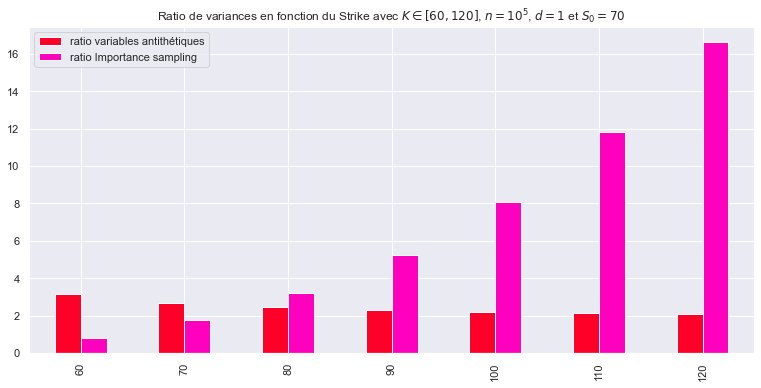

In [17]:
ratio_antith = df_mc_IS["var"] / df_antith_IS["var"]
ratio_Importance = df_mc_IS["var"] / df_IS ["var"]

A_IS = ratio_antith.to_list()
C_IS = ratio_Importance.to_list()

df_ratio = pd.DataFrame(A_IS, columns=["ratio variables antithétiques"], index= K_IS)
df_ratio["ratio Importance sampling"] = C_IS #je rajoute une colonne 


df_ratio.plot.bar(colormap='gist_rainbow', figsize=(13,6))  #data frame visualisé directement avec des barres 
plt.title('Ratio de variances en fonction du Strike avec $K\in[60,120]$, $n=10^5$, $d =1$ et $S_0=70$')


- Les résultats obeservés sont cohérents. En effet, plus l'écart $\Delta = (K - S_0)$ augmente, et plus l'évènement devient rare, donc plus l'approximation par Importance Sampling est efficace (par rapport aux autres méthodes de réduction de variance). 
- Le cas $K = 120$ et $S_0 = 70$ est ici le cas le plus extrême où l'approximation par Importance Sampling est nettement optimale.
- Le cas $K = 70$ et $S_0 = 70$ est le cas limite où l'utilisation de l'approximation par Importance Sampling n'a plus d'interêt. En effet, la condition $S_0 << K$ n'est plus respectée.  

Cette partie de l'étude nous montre que les méthodes de réduction de variance dépendent des paramètres observés. Il faut adapter celles-ci à chaque situation; La méthode de réduction de variance par mélange de contrôle optimal & antithétique n'est donc pas forcément toujours le meilleur choix. 

L'approximation faite pour déterminer la valeur de $\theta$ n'est pas fine, mais elle est raisonnable quand $S_0 << K$. Cependant, quand on veut faire une $\textit{gestion de portefeuille}$ avec plusieurs valeurs de Strikes et de Maturités à la foi, cette approche n'est plus valable et il faudra faire appel à d'autres méthodes plus sophistiquées. 

## V. Etude de quelques paramètres 
  

En général, il est courant de faire varier plusieurs variables dans le modèle Black-Scholes pour mieux comprendre leur impact sur la valeur de l'option, y compris S0, le strike, l'horizon, la volatilité et le rendement. Cela peut aider les investisseurs à prendre des décisions plus éclairées sur la négociation d'options en fonction des conditions de marché actuelles.

$\textbf{1. Influence du Strike K}$

On veut tracer plusieurs valeurs du prix du Call et de sa variance en foncion du paramètre K. On fixe donc tous les autres paramètres et on fait uniquement varier $K\in [30,160]$ afin d'observer son influence. Par ailleurs on a fixé $S_0 = 100$. Vu que cette configuration présente à la fois des évènements extrêmes et des évènements non extrêmes, on va se contenter dans un premier temps d'appliquer un Monte Carlo classique, sans réduction de variance. 

On va donc appliquer la fonction `Monte carlo` à une liste de valeurs qui dépendent de K 

In [12]:
n = int(1e5)
sample_G_K = rng.standard_normal(size=(d, n))
Ks = list(range(30,165,5))
Liste_K = [ monte_carlo(psi(sample_G_K, mu, T, sigma, S0, mat_L, k), 0.95) for k in Ks ]


df_K = pd.DataFrame(Liste_K, columns=['mean', 'var', 'lower', 'upper'], index=Ks)
df_K.style.set_table_attributes("style='display:inline'").set_caption('MC avec $n=10^5$, $d =10$ et $T=1$')


,mean,var,lower,upper
30,71.027543,242.352811,70.931055,71.124030
35,66.027543,242.352811,65.931055,66.124030
40,61.027543,242.352811,60.931055,61.124030
45,56.027543,242.352811,55.931055,56.124030
50,51.027543,242.352811,50.931055,51.124030
55,46.027543,242.352811,45.931055,46.124030
60,41.027753,242.335047,40.931269,41.124238
65,36.029712,242.187383,35.933257,36.126167
70,31.044812,241.194833,30.948555,31.141069
75,26.111153,237.475437,26.015641,26.206665


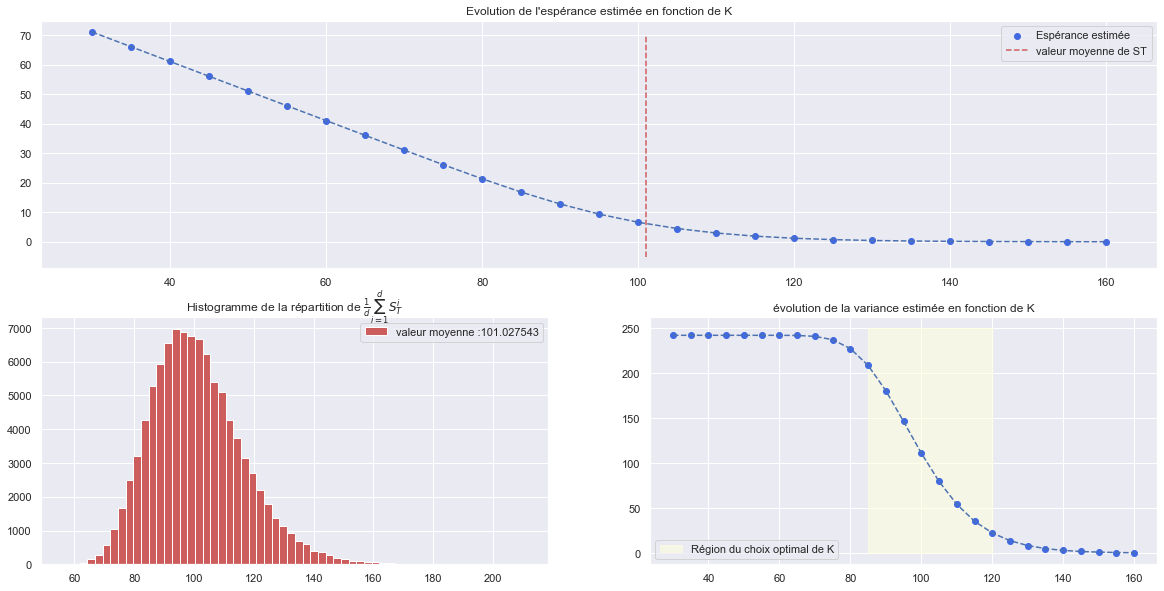

In [34]:
# Création d'un graphique avec 3 sous-graphiques
fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot2grid((2,2), (0,0), colspan=2)
ax2 = plt.subplot2grid((2,2), (1,0))
ax3 = plt.subplot2grid((2,2), (1,1))

ST = S0[:,None] * np.exp(mu[:,None] * T + sigma[:,np.newaxis] * np.sqrt(T) * mat_L @ sample_G_K) 
g = np.mean(ST,axis=0 )
ax2.hist(g, bins=60, label =f'valeur moyenne :{np.mean(g):f}', color='indianred') 
ax2.set_title (r"Histogramme de la répartition de ${\frac{1}{d} \sum_{i=1}^{d} S_T^i}$")

ax2.legend()

ax1.scatter (Ks , df_K['mean'], label ='Espérance estimée', color='royalblue') #on trace les valeurs de l'espérance qui proviennent du data frame
ax1.plot( Ks,df_K['mean'], '--') #on relie les points entre eux pour observer une tendance 
ax1.vlines(np.mean(g), ymin=-5, ymax=70,linestyle='--', color='indianred', label='valeur moyenne de ST')
ax1.set_title ("Evolution de l'espérance estimée en fonction de K")
ax1.legend()
 
ax3.fill_between( Ks[11:19] , 0, 250, color = 'lightyellow', alpha = 0.6, label='Région du choix optimal de K')
ax3.scatter (Ks , df_K['var'], color='royalblue') #on trace les valeurs de la variance qui proviennent du dara frame  
ax3.plot (Ks , df_K['var'],'--') #on relie les points entre eux 
ax3.set_title ("évolution de la variance estimée en fonction de K")
ax3.legend(loc='lower left')


- On remarque que l'espérance diminue quand on augmente la valeur de $K$. Elle est maximale pour $K=30$ et diminue jusqu'a atteindre la valeur $0$. Pour comprendre un peu mieux ce qui se passe, on a tracé l'histogramme de la répartition de $\frac{1}{d} \sum_{i=1}^{d} S_T^i $. On remarque que cette V.A. est centrée autour de $\approx 101$. Elle est donc centrée autour de $S_0$. Un calcul rapide avec la méthode de variation de la fonction muette nous confirme cette obervation. 
- Ceci explique la tendance observée dans la variation de l'espérance : quand $K<100\approx S_0$, la quantité $\bigl(\frac{1}{d} \sum_{i=1}^{d} S_T^i - K \bigr)$ sera en moyenne positive et donc $\bigl(\frac{1}{d} \sum_{i=1}^{d} S_T^i - K \bigr)_+$ va renvoyer aussi en moyenne une valeur positive. Cependant, quand $K>>100$, la quantité $\bigl(\frac{1}{d} \sum_{i=1}^{d} S_T^i - K \bigr)$ sera en moyenne négative et $\bigl(\frac{1}{d} \sum_{i=1}^{d} S_T^i - K \bigr)_+$ sera en moyenne nulle; c'est l'évènement extrême qu'on avait étudié dans la partie précédente. 
- Le graphique de la variance valide aussi ce phénomène, en effet, la variance s'annule aussi quand $K>>100$.  
- La variance est, par ailleurs, très élevée quand $K<<100\approx S_0$ et diminue drastiquement quand $K$ varie aux alentours de $S_0$. Il y a donc une région optimale du choix de $K$ (zone délimitée en jaune sur le graphique); En effet, si on veut faire des estimations avec le moins d'erreurs possibles avec l'approximation de monte carlo classique, il serait préférable de choisir une valeur qui soit proche de $S_0$. 
- En pratique on n'a pas d'influence sur le choix de K, c'est une valeur qui nous est imposée par le contrat d'achat. On peut cependant prédire au préalable la précision de notre estimation en fonction de la valeur proposé. 


$\textbf{2. Influence du nombre d'échantillon n }$

On applique la même méthode que pour la variation du paramètre $K$. On fixe tous les paramètres et on fait varier $n\in[2^{10}, 2^{24}]$.

Ici il n'y a pas d'évènements extrêmes; En théorie ça serait intéressant d'appliquer la méthode de réduction de variance par le mélange contrôle optimal & antithétique, mais pour l'instant on se contente de la simulation avec de monte carlo. 

In [29]:
K = 80
N = [2**m for m in range (10,25)]

sample_G_N = [rng.standard_normal(size=(d,n)) for n in N]
Liste_N=[monte_carlo(psi(s, mu, T, sigma, S0, mat_L, K), 0.95) for s in sample_G_N ]


df_N = pd.DataFrame(Liste_N, columns=['mean', 'var', 'lower', 'upper'], index=N)
df_N.style.set_table_attributes("style='display:inline'").set_caption('MC avec $K=80$, $d =10$ et $T=1$')



,mean,var,lower,upper
1024,20.482753,203.539386,19.608932,21.356574
2048,20.783711,228.027007,20.129713,21.437709
4096,21.353913,235.780827,20.883670,21.824156
8192,21.452227,233.792876,21.121120,21.783335
16384,21.297968,224.859523,21.068356,21.527579
32768,21.362951,225.281763,21.200439,21.525464
65536,21.359856,227.435491,21.244395,21.475318
131072,21.327527,228.701262,21.245656,21.409397
262144,21.245618,226.824651,21.187965,21.303271
524288,21.294165,228.551598,21.253243,21.335087


Text(0.5, 1.0, 'Evolution de la variance estimée et son intervalle de confiance en fonction de n')

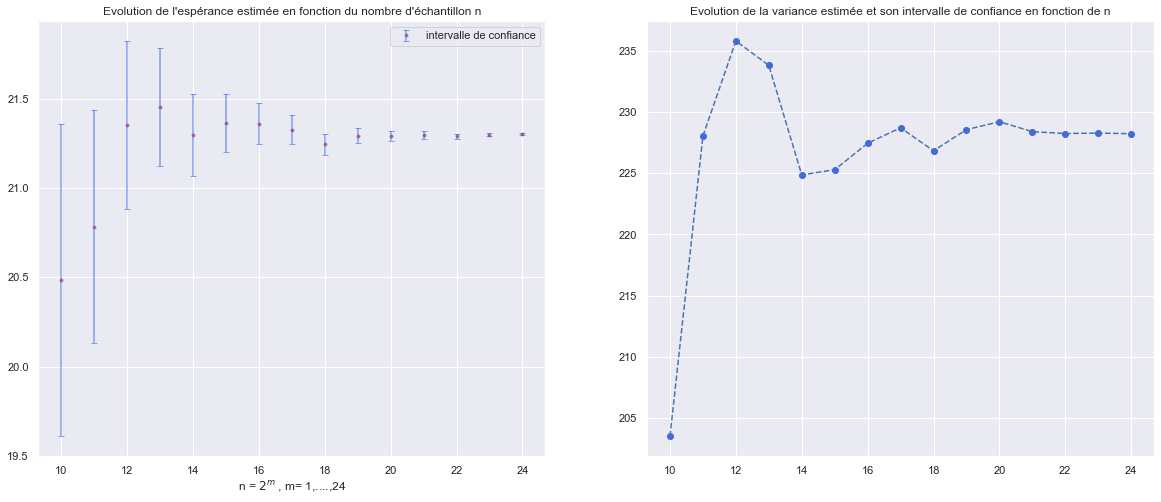

In [30]:
fig, (ax1, ax2) = plt.subplots( nrows= 1 , ncols = 2 , figsize = (20, 8)) 
abscisse =list(range(10,25,1))
valeurs  = df_N.to_numpy()

ax1.set_title ("Evolution de l'espérance estimée en fonction du nombre d'échantillon n")
ax1.set_xlabel ( 'n = $2^m$ , m= 1,....,24')
ax1.errorbar(abscisse, df_N['mean'], yerr=(df_N['upper'] - df_N['lower']) / 2,mfc='red' ,fmt='.', ecolor='royalblue',alpha=0.6, capsize=3 , label ='intervalle de confiance')
ax1.legend()

ax2.scatter (abscisse , df_N['var'], color='royalblue')
ax2.plot (abscisse , df_N['var'],'--')
ax2.set_title ("Evolution de la variance estimée et son intervalle de confiance en fonction de n")


- Le résultat de l'espérance gagne en précision quand $n$ augmente. En effet, plus $n$ augmente et plus le résultat se stabilise aux alentours de $21.3$. Cela s'explique grâce à la loi forte des grands nombres; l'estimater est consistant pour un echantillon suffisamment grand. 
- L'intervalle de confiance diminue également. En effet on rappelle que
$$I_c = \biggl( m \in 
  \biggl[
    m_n - \frac{\phi^{-1}(\frac{\alpha}{2}) \sigma_n}{\sqrt{n}}, 
    m_n + \frac{\phi^{-1}(\frac{\alpha}{2}) \sigma_n}{\sqrt{n}}
  \biggr] \biggr)
$$
Pour un $n$ donné, l'intervalle de confiance varie d'un facteur $\approx \frac{1}{\sqrt{n}}$.  
- Enfin, on observe que la variance se stabilise aussi pour un $n$ assez grand. En effet,   
$$\sigma_n^2 = \frac{1}{n-1} \sum_{k=1}^n (X_k - m_n)^2 \quad \text{pour} \; n \ge 2 $$
est l'estimateur sans biais de la variance $\sigma$ et on sait d'après la loi forte des grands nombres qu'il est consistant. 

$\textbf{3. Influence de la dimension d }$

In [114]:
D = list(range(1,21)) 

rho = 0.2
T = 1
K = 80
n = int(1e5)
Liste_D = []

for dimension in D : 

    r = 0.01
    S0_D = np.full(dimension, 100)
    sigma_D = np.arange(1,dimension+1)/(2*dimension)
    mu_D = r - 0.5*sigma_D**2

    correl_D = np.full((dimension,dimension), rho) + (1-rho)*np.eye(dimension) #matrice avec des rho + matrice avec (1-rho) sur la diagonale  
    mat_L_D = np.linalg.cholesky(correl_D)

    sample_G_D = rng.standard_normal(size=(dimension, n)) 
 
    resultat = monte_carlo(psi(sample_G_D, mu_D, T, sigma_D, S0_D, mat_L_D, K))
    Liste_D.append(resultat) 

df_D = pd.DataFrame(Liste_D, columns=['mean', 'var', 'lower', 'upper'], index = D )
df_D.style.set_table_attributes("style='display:inline'").set_caption('MC avec $K=80$, $n=10^5$, et $T=1$')


,mean,var,lower,upper
1,30.327011,2122.153675,30.041491,30.612531
2,24.105341,817.003104,23.928183,24.282498
3,22.759121,537.940240,22.615369,22.902874
4,22.081343,412.126642,21.955519,22.207167
5,21.705748,342.676390,21.591015,21.820482
6,21.654702,306.438880,21.546205,21.763200
7,21.490314,277.074492,21.387146,21.593483
8,21.381693,254.840356,21.282751,21.480636
9,21.342409,239.713083,21.246448,21.438370
10,21.307646,229.102049,21.213833,21.401459


Text(0.5, 1.0, 'Evolution de la variance estimée en fonction de la dimension d')

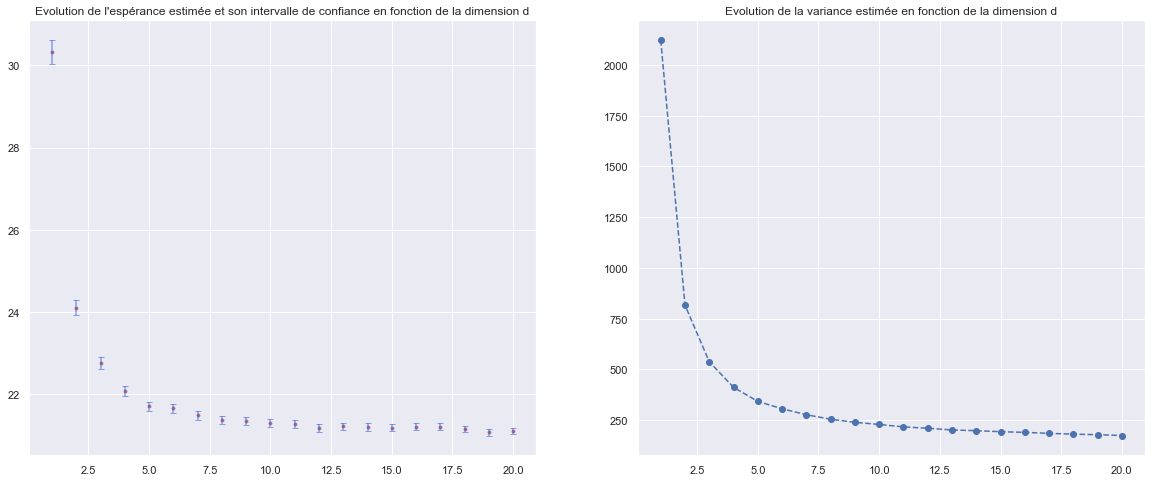

In [116]:
fig, (ax1, ax2) = plt.subplots( nrows= 1 , ncols = 2 , figsize = (20, 8))
                               
xx_D = list(range(1,21))
valeurs_D  = df_D.to_numpy()
ax1.errorbar(xx_D, df_D['mean'], yerr=(df_D['upper'] - df_D['lower']) / 2,mfc='red' ,fmt='.', ecolor='royalblue',alpha=0.6, capsize=3)
ax1.set_title ("Evolution de l'espérance estimée et son intervalle de confiance en fonction de la dimension d")

 
ax2.scatter (xx_D , df_D['var'])
ax2.plot (xx_D , df_D['var'],'--')
ax2.set_title ("Evolution de la variance estimée en fonction de la dimension d")

- On observe que la variance du call diminue en fonction de la dimension $d$. Pour s'en convaincre, essayons de calculer la variance du prix du call en dimension $d=1$ et $d=2$. 
$$\mathbb{V}(\log S_1) =\log(S_0)+  \sigma^2 T \mathbb{V}(\tilde{G}_1) =  \log(S_0) + T \sigma^2 $$ 
$$\mathbb{V}(log(S_1 + S_2)) = log(S_0) + T \mathbb{V}(\sigma_1 \tilde{G}_1 + \sigma_2 \tilde{G}_2) $$ 
On rappelle que $$(\tilde{G_1},\tilde{G_2})  \sim \mathcal{N} \big(0, \gamma \big)$$ 
où 
$$ \gamma = \begin{pmatrix}
1  & \rho \\
\rho & 1
\end{pmatrix}
$$
Donc on en déduit que 
$$\mathbb{V}(S_1 + S_2) = log(S_0) + T Cov( \sigma_1 \tilde{G_1}+\sigma_2\tilde{G_2}, \sigma_1 \tilde{G_1}+\sigma_2\tilde{G_2}) = log(S_0)+ T (\sigma_1^2 + \sigma_2^2+2 \sigma_1 \sigma_2 \rho)$$ 

Comme $\rho < 1$ ,$\sigma = \frac{1}{2}$ ,$\sigma_1 =\frac{1}{4}$ ,$\sigma_2 = \frac{1}{2}$ par définition 

On en déduit 
$$\mathbb{V}(log(S_1+S_2)) < \mathbb{V}(log(S_1))$$ 
Donc que   
$$\mathbb{V}((\frac{1}{2}log((S_1+S_2))-K)_+) < \mathbb{V}((log(S_1)-K)_+)$$ 
Avec certaines hypothèses, on pourrait peut être prouver que 
$$\mathbb{V}((\frac{1}{2}(S_1+S_2)-K)_+) < \mathbb{V}(S_1-K)_+)$$ 

- Ceci expliquerait aussi pourquoi l'estimation de l'espérance devient de plus en plus précise quand on augmente $d$. En effet, plus la variance diminue et plus l'intervalle de confiance de l'estimation diminue. 


- La corrélation entre les actifs, ainsi que le choix des valeurs de $\sigma$ jouent donc un rôle important dans la réduction de la variance. 
Cela explique aussi l'écart considérable entre la valeur estimée en dimension 1 et les autres dimensions. En effet, en dimension 1 il n'y a pas de corrélation entre les mouvements browniens et on perd énormément en information. 

##
##
##
Après avoir effectué l'étude de ces trois paramètres, il serait pertinent de noter l'observation suivante :

Notre code n'est pas implémenté de manière optimale. En effet, afin de tracer l'impact d'un paramètre, on doit générer à chaque fois un échantillon de loi normale, faire appel aux fonctions `psi` et `monte carlo` et créer une liste des données que l'on veut tracer. De même, il faut à chaque fois définir les fonctions de la librairie `matplotlib`. Cette "répétition" dans le code est juste mais pas pratique. 

Nous vous proposons, dans la deuxième partie de ce projet, une programmation orientée object qui facilitera la suite de l'étude paramétrique. 

##
##
##

$\textbf{Sources bibliographiques de la partie 1}$

1. I. Kharroubi, P. Bougerol, $\textit{Calcul Stochastique et introduction au contrôle stochastique}$

2. G.Pagès $\textit{Numerical probability, An introduction with Applications to Finance}$

3. E.Temam $\textit{Méthodes de Monte Carlo pour la finance}$ 

4. C.Bec  $\textit{Impacts des risques financiers inhérents à la détention de produits structurés "Autocalls"}$ 